In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
A1 = np.load('mnist_float32/sequential_1_dense_1_MatMul.npy')
B1 = np.load('mnist_float32/dense_1_bias.npy')
A2 = np.load('mnist_float32/sequential_1_dense_2_MatMul.npy')
B2 = np.load('mnist_float32/dense_2_bias.npy')
test_image = np.load('test_image_label_27.npy')
print(A1.shape, B1.shape)
print(A2.shape, B2.shape)
print(test_image.shape, test_image.dtype)

(128, 784) (128,)
(10, 128) (10,)
(28, 28) float32


In [28]:
print(A1.flatten()[0:5])
print(B1[0:5])

[ 0.0491386  -0.03703919 -0.02769626 -0.05841282  0.05449576]
[-0.06567852  0.13846287 -0.06368221  0.01163622  0.10017338]


For index 27, the expected label is 4. Here's the expected tensor output obtained by running the TFLite interpretor: 

```
test_model(tflite_model_file, 27, model_type="Float")
```

**[-13.089978   -8.978213   -8.512205   -6.994018   13.381388   -6.6630683
 -11.334353   -3.0743856  -8.96207     2.6339076]**

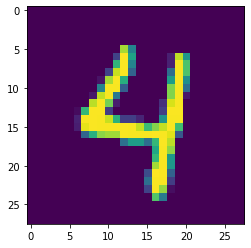

In [29]:
plt.imshow(test_image)
plt.show()

In [30]:
#print(test_image)
print(test_image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [31]:
def ReLU(x):
    return x * (x > 0)

In [32]:
X = test_image.flatten()
X1 = ReLU(np.matmul(A1, X) + B1)
print(X1, X1.shape)

[-0.         -0.          1.2930983  -0.          3.661437    0.51074487
 -0.         -0.         -0.          2.4868505   1.0581362  -0.
  2.0740378  -0.         -0.         -0.         -0.          0.58377826
 -0.          2.2729173  -0.         -0.          1.5046257  -0.
  1.197472   -0.          1.9579562  -0.         -0.          2.9273798
 -0.         -0.         -0.          1.8213584   0.11645561  2.494976
 -0.          0.57651776 -0.         -0.          0.34691343  0.74767464
  0.12566558  3.27794     1.9157474  -0.         -0.         -0.
  4.2646685   1.280635    2.3956647  -0.         -0.          0.6198743
  0.54031783 -0.         -0.         -0.         -0.          0.67471796
 -0.          1.7010128  -0.          2.8753843  -0.          1.1004485
 -0.         -0.         -0.         -0.         -0.         -0.
  0.19657335 -0.         -0.         -0.         -0.          3.359786
  2.2787862   2.0925064   1.0966914   0.13870227 -0.         -0.
  3.0983274  -0.         

In [33]:
X2 = np.matmul(A2, X1) + B2
print(X2, X2.shape)
print(X2.argmax())

[-13.089977   -8.978212   -8.512204   -6.994018   13.381387   -6.663069
 -11.334356   -3.074383   -8.962071    2.6339078] (10,)
4
